# Import imputed dataset - Do both categorical and regression modeling


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd ../Desktop/Insight/2012_MEPS/

/Users/bstankev/Desktop/Insight/2012_MEPS


# import imputated feature data

In [4]:
df = pd.read_csv('imp.csv')

In [5]:
df.head()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,OBVGrp,OBVGrp2,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY42,HONRDC42
0,0,20004,101,20004101,46,58,50,50,7,30.6,...,1,1,1,5,1,3,14,2,2,2
1,1,20004,102,20004102,46,58,50,50,7,30.1,...,1,1,1,5,1,3,13,2,2,2
2,2,20004,103,20004103,46,58,50,50,7,27.0,...,1,1,1,5,6,3,2,2,3,3
3,3,20005,101,20005101,41,58,50,50,7,25.1,...,4,6,1,3,4,3,14,2,2,2
4,4,20005,102,20005102,46,58,50,50,7,21.3,...,2,3,1,3,5,3,14,1,2,2


# Create columns with log(expenditure) type

In [6]:
df['OBVEXPlog'] = 0
df['ERTEXPlog'] = 0
df['HHAEXPlog'] = 0
df['IPTEXPlog'] = 0
df['RXEXPlog'] = 0
df['TOTEXPlog'] = 0
df.loc[(df["OBVEXP12"] > 0), "OBVEXPlog"] = np.log(df['OBVEXP12'])
df.loc[(df["ERTEXP12"] > 0), "ERTEXPlog"] = np.log(df['ERTEXP12'])
df.loc[(df["HHAEXP12"] > 0), "HHAEXPlog"] = np.log(df['HHAEXP12'])
df.loc[(df["IPTEXP12"] > 0), "IPTEXPlog"] = np.log(df['IPTEXP12'])
df.loc[(df["RXEXP12"] > 0), "RXEXPlog"] = np.log(df['RXEXP12'])
df.loc[(df["TOTEXP12"] > 0), "TOTEXPlog"] = np.log(df['TOTEXP12'])

In [7]:
df.OBVEXPlog.unique()

array([ 0.        ,  6.11146734,  4.84418709, ...,  8.21229714,
        8.52237972,  8.33782726])

In [8]:
df.ADNRGY42.unique()
#'POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
#            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
#            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
#            "ADNRGY42"]]

array([ 3.,  2.,  4.,  1.,  5.])

# Create feature/class variables for each model

### Office Based Visits

In [9]:
obX = df[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42"]].values


obY = df['OBVEXPlog'].values

### ER Visits

In [379]:
erX = df[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "DIABAGED",'AGELAST']].values

# re-scale (normalize) continuous  & categorical (ordinal) data
erX1 = preprocessing.StandardScaler().fit(erX)
erX1 = erX1.transform(erX)

erY = df['ERTEXPlog'].values

### Inpatient Visits

In [380]:
ipt = df[['POVLEV12','HLTHSTAT',"BMINDX53",
            'AGELAST', "CHOLAGED"]]

#ipt = df[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
#            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
 #           "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',"ADNRGY42"]].values

# re-scale (normalize) continuous  & categorical (ordinal) data
inX1 = preprocessing.StandardScaler().fit(ipt)
inX1 = inX1.transform(ipt)

inX2 = np.append(inX1,df[['HIDEG','SEX','ANYLIM12', 'HISPCAT']], axis=1)

inY = df['IPTEXPlog'].values

### RX 

In [381]:
rx = df[['POVLEV12','HLTHSTAT',"BMINDX53",'MNHLTHSTAT','AGELAST',
         'ADHDAGED','ADPAIN42','EDRECODE','HIBPAGED', 
         "STRKAGED","DIABAGED","CHOLAGED", "ADNRGY42"]].values

# re-scale (normalize) continuous  & categorical (ordinal) data
rxX1 = preprocessing.StandardScaler().fit(rx)
rxX1 = rxX1.transform(rx)

rxX2 = np.append(rxX1,df[['HIDEG','RACEV1X','ANYLIM12']], axis=1)
#"
#'ANYLIM12',
rxY = df['RXEXPlog'].values

### Home Health 

In [382]:
hh = df[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "CHOLAGED", "ADCAPE42", 'EDRECODE',"ADNRGY42",
            ]].values

# re-scale (normalize) continuous  & categorical (ordinal) data
hhX1 = preprocessing.StandardScaler().fit(hh)
hhX1 = hhX1.transform(hh)

hhX2 = np.append(hhX1,df[['MARRY12X', 'RACEV1X']], axis=1)

hhY = df['HHAEXPlog'].values

### Total 

In [383]:
tot = df[['MNHLTHSTAT','HLTHSTAT', 'AGELAST',
            'POVLEV12','EDRECODE',"HIBPAGED", 
            "STRKAGED","CHOLAGED", "DIABAGED", "JTPAIN31",
            "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42",  
            "ADNRGY42"]].values

# re-scale (normalize) continuous  & categorical (ordinal) data
totX1 = preprocessing.StandardScaler().fit(tot)
totX1 = totX1.transform(tot)

totX2 = np.append(totX1,df[['HIDEG', 'SEX']], axis=1)

totY = df['TOTEXPlog'].values

# GBRT model (imputed features)

### Office-based visits

In [10]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

obX1 = preprocessing.StandardScaler().fit(obX)
obX1 = obX1.transform(obX)

In [11]:
# run model (using hyperparameters from optimization)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

rng = np.random.RandomState(42)
obx_train, obx_test, oby_train, oby_test = train_test_split(obX1,obY, random_state=rng)
obclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
obclf.fit(obx_train,oby_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [386]:
# Calculate Mean Absolute Value
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(oby_test, obclf.predict(obx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 2.3229


In [387]:
# Calculate r^2 score
from sklearn.metrics import r2_score

ob_pred = obclf.predict(obx_test)
obr2 = r2_score(oby_test, ob_pred) 
print obr2

0.245680189434


### General hyperparameters for models (may change, depending on model)

In [388]:
# hyperparameters for GBRT model
params = {'n_estimators': 20000, 
          'max_depth': 2, 
          'min_samples_leaf': 5,
          'learning_rate': 0.01, 
          'max_features': 0.3}

### ER visits

In [389]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
erx_train, erx_test, ery_train, ery_test = train_test_split(erX2,erY, random_state=rng)
erclf = GradientBoostingRegressor(n_estimators=20, 
          max_depth=2, 
          min_samples_leaf=5,
          learning_rate=0.01, 
          max_features=0.3)
erclf.fit(erx_train,ery_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [390]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(ery_test, erclf.predict(erx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.3166


In [391]:
# Calculate r^2 score
er_pred = erclf.predict(erx_test)
err2 = r2_score(ery_test, er_pred) 
print err2

0.0100154556073


### Inpatient visits

In [392]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
inx_train, inx_test, iny_train, iny_test = train_test_split(inX2,inY, random_state=rng)
inclf = GradientBoostingRegressor(n_estimators=20, 
          max_depth=2, 
          min_samples_leaf=5,
          learning_rate=0.01, 
          max_features=0.3)
inclf.fit(inx_train,iny_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [393]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(iny_test, inclf.predict(inx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.0230


In [394]:
# Calculate r^2 score
in_pred = inclf.predict(inx_test)
inr2 = r2_score(iny_test, in_pred) 
print inr2

0.0137567996624


### RX

In [395]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
rxx_train, rxx_test, rxy_train, rxy_test = train_test_split(rxX2,rxY, random_state=rng)
rxclf = GradientBoostingRegressor(**params)
rxclf.fit(rxx_train,rxy_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [396]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(rxy_test, rxclf.predict(rxx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.8825


In [397]:
# Calculate r^2 score
rx_pred = rxclf.predict(rxx_test)
rxr2 = r2_score(rxy_test, rx_pred) 
print rxr2

0.426892345157


### Home Health

In [398]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
hhx_train, hhx_test, hhy_train, hhy_test = train_test_split(hhX2,hhY, random_state=rng)
hhclf = GradientBoostingRegressor(**params)
hhclf.fit(hhx_train,hhy_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [399]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(hhy_test, hhclf.predict(hhx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 0.2559


In [400]:
# Calculate r^2 score
hh_pred = hhclf.predict(hhx_test)
hhr2 = r2_score(hhy_test, hh_pred) 
print hhr2

0.0949127895499


### Total 

In [401]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
totx_train, totx_test, toty_train, toty_test = train_test_split(totX2,totY, random_state=rng)
totclf = GradientBoostingRegressor(**params)
totclf.fit(totx_train,toty_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [402]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(toty_test, totclf.predict(totx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 2.2287


In [403]:
# Calculate r^2 score
tot_pred = totclf.predict(totx_test)
totr2 = r2_score(toty_test, tot_pred) 
print totr2

0.298428552841


# Logistic regression OR Random Forest Classifier- classification (yes, no) of spending money

## in the end Random Forest Classifier made more sense/worked better

### Office based visits

In [12]:
df['OBVEXPcat'] = np.where(df['OBVEXP12']>0, 1, 0)

In [13]:
obcX = df[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42"]]

obcY = df['OBVEXPcat']

In [14]:
df[['OBVEXPcat','OBVEXP12']]

,OBVEXPcat,OBVEXP12
0,0,0
1,0,0
2,0,0
3,1,451
4,1,127
5,1,143
6,0,0
7,0,0
8,0,0
9,0,0


In [15]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

rng = np.random.RandomState(42)
obcx_train, obcx_test, obcy_train, obcy_test = train_test_split(obcX,obcY, random_state=rng)

model = LogisticRegression()
model.fit(obcx_train, obcy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [16]:
# make predictions
expected = obcy_test
predicted = model.predict(obcx_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.52      0.26      0.35      3612
          1       0.66      0.86      0.75      6132

avg / total       0.61      0.64      0.60      9744

[[ 933 2679]
 [ 858 5274]]


In [17]:
score = metrics.accuracy_score(obcy_test, predicted)
print("accuracy:   %0.3f" % score)

accuracy:   0.637


In [21]:
from sklearn.ensemble import RandomForestClassifier

# split the data
xro_train, xro_test, yro_train, yro_test = train_test_split(obcX, obcY, random_state=42)

#sw = np.array([2 if i == 1 else 1 for i in yro_train])

ro2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
ro2.fit(xro_train,yro_train)#,sample_weight=sw

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [22]:
# make predictions
expected = yro_test
predicted = ro2.predict(xro_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yro_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.63      0.38      0.48      3612
          1       0.71      0.87      0.78      6132

avg / total       0.68      0.69      0.67      9744

accuracy:   0.689


### ER visits

In [410]:
df['ERTEXPcat'] = np.where(df['ERTEXP12']>0, 1, 0)
ercY = df['ERTEXPcat']

In [411]:
df[['ERTEXPcat','ERTEXP12']]

,ERTEXPcat,ERTEXP12
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [415]:
df.groupby('ERTEXPcat').count()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,FTSTU12X,ACTDTY42,HONRDC42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog,OBVEXPcat
ERTEXPcat,,,,,,,,,,,,,,,,,,,,,
0,34347,34347,34347,34347,34347,34347,34347,34347,34347,34347,...,34347,34347,34347,34347,34347,34347,34347,34347,34347,34347
1,4627,4627,4627,4627,4627,4627,4627,4627,4627,4627,...,4627,4627,4627,4627,4627,4627,4627,4627,4627,4627


In [412]:
rng = np.random.RandomState(42)
ercx_train, ercx_test, ercy_train, ercy_test = train_test_split(erX2,ercY, random_state=rng)

model = LogisticRegression()
model.fit(ercx_train, ercy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [413]:
# make predictions
expected = ercy_test
predicted = model.predict(ercx_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      8604
          1       0.57      0.01      0.03      1140

avg / total       0.85      0.88      0.83      9744

[[8592   12]
 [1124   16]]


In [427]:
score = metrics.accuracy_score(ercy_test, predicted)
print("accuracy:   %0.3f" % score)

accuracy:   0.883


In [418]:
from sklearn.ensemble import RandomForestClassifier

# split the data
xre_train, xre_test, yre_train, yre_test = train_test_split(erX2, ercY, random_state=42)

sw = np.array([7 if i == 1 else 1 for i in yre_train])

re2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
re2.fit(xre_train,yre_train,sample_weight=sw)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [419]:
# make predictions
expected = yre_test
predicted = re2.predict(xre_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yre_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.91      0.78      0.84      8604
          1       0.21      0.45      0.29      1140

avg / total       0.83      0.74      0.78      9744

accuracy:   0.742


### Inpatient visits

In [420]:
df['IPTEXPcat'] = np.where(df['IPTEXP12']>0, 1, 0)
incY=df['IPTEXPcat'].values

In [423]:
rng = np.random.RandomState(42)
incx_train, incx_test, incy_train, incy_test = train_test_split(inX2,incY, random_state=rng)

model = LogisticRegression()
model.fit(incx_train,incy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [424]:
# make predictions
expected = incy_test
predicted = model.predict(incx_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      9149
          1       0.00      0.00      0.00       595

avg / total       0.88      0.94      0.91      9744

[[9149    0]
 [ 595    0]]


In [426]:
score = metrics.accuracy_score(incy_test, predicted)
print("accuracy:   %0.3f" % score)

accuracy:   0.939


In [430]:
df.groupby('IPTEXPcat').count()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,ACTDTY42,HONRDC42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog,OBVEXPcat,ERTEXPcat
IPTEXPcat,,,,,,,,,,,,,,,,,,,,,
0,36613,36613,36613,36613,36613,36613,36613,36613,36613,36613,...,36613,36613,36613,36613,36613,36613,36613,36613,36613,36613
1,2361,2361,2361,2361,2361,2361,2361,2361,2361,2361,...,2361,2361,2361,2361,2361,2361,2361,2361,2361,2361


In [431]:
# split the data
xri_train, xri_test, yri_train, yri_test = train_test_split(inX2, incY, random_state=42)

sw = np.array([16 if i == 1 else 1 for i in yri_train])

ri2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
ri2.fit(xri_train,yri_train,sample_weight=sw)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [432]:
# make predictions
expected = yri_test
predicted = ri2.predict(xri_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yri_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.97      0.75      0.85      9149
          1       0.15      0.66      0.24       595

avg / total       0.92      0.75      0.81      9744

accuracy:   0.746


### RX

In [434]:
df['RXEXPcat'] = np.where(df['RXEXP12']>0, 1, 0)
rxcY=df['RXEXPcat'].values

In [435]:
df.groupby('RXEXPcat').count()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,HONRDC42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog,OBVEXPcat,ERTEXPcat,IPTEXPcat
RXEXPcat,,,,,,,,,,,,,,,,,,,,,
0,18598,18598,18598,18598,18598,18598,18598,18598,18598,18598,...,18598,18598,18598,18598,18598,18598,18598,18598,18598,18598
1,20376,20376,20376,20376,20376,20376,20376,20376,20376,20376,...,20376,20376,20376,20376,20376,20376,20376,20376,20376,20376


In [436]:
# split the data
xrx_train, xrx_test, yrx_train, yrx_test = train_test_split(rxX2, rxcY, random_state=42)

rx2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
rx2.fit(xrx_train,yrx_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [437]:
# make predictions
expected = yrx_test
predicted = rx2.predict(xrx_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yrx_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.66      0.82      0.73      4638
          1       0.79      0.61      0.69      5106

avg / total       0.73      0.71      0.71      9744

accuracy:   0.710


### Home health

In [440]:
df['HHAEXPcat'] = np.where(df['HHAEXP12']>0, 1, 0)
hhcY=df['HHAEXPcat'].values

In [441]:
df.groupby('HHAEXPcat').count()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog,OBVEXPcat,ERTEXPcat,IPTEXPcat,RXEXPcat
HHAEXPcat,,,,,,,,,,,,,,,,,,,,,
0,38307,38307,38307,38307,38307,38307,38307,38307,38307,38307,...,38307,38307,38307,38307,38307,38307,38307,38307,38307,38307
1,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667


In [442]:
# split the data
xrh_train, xrh_test, yrh_train, yrh_test = train_test_split(hhX2, hhcY, random_state=42)

sw = np.array([57 if i == 1 else 1 for i in yrh_train])

rh2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
rh2.fit(xrh_train,yrh_train,sample_weight=sw)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [443]:
# make predictions
expected = yrh_test
predicted = rh2.predict(xrh_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yrh_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.99      0.92      0.95      9590
          1       0.11      0.62      0.18       154

avg / total       0.98      0.91      0.94      9744

accuracy:   0.914


### Total

In [444]:
df['TOTEXPcat'] = np.where(df['TOTEXP12']>0, 1, 0)
totcY=df['TOTEXPcat'].values

In [445]:
df.groupby('TOTEXPcat').count()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog,OBVEXPcat,ERTEXPcat,IPTEXPcat,RXEXPcat,HHAEXPcat
TOTEXPcat,,,,,,,,,,,,,,,,,,,,,
0,9167,9167,9167,9167,9167,9167,9167,9167,9167,9167,...,9167,9167,9167,9167,9167,9167,9167,9167,9167,9167
1,29807,29807,29807,29807,29807,29807,29807,29807,29807,29807,...,29807,29807,29807,29807,29807,29807,29807,29807,29807,29807


In [446]:
# split the data
xrt_train, xrt_test, yrt_train, yrt_test = train_test_split(totX2, totcY, random_state=42)

sw = np.array([3 if i == 0 else 1 for i in yrt_train])

rt2 = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=100, 
                              max_features=0.5, max_depth=7, min_samples_leaf=2)
rt2.fit(xrt_train,yrt_train,sample_weight=sw)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=7, max_features=0.5,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=2, n_estimators=100, n_jobs=100,
            oob_score=True, random_state=None, verbose=0)

In [447]:
# make predictions
expected = yrt_test
predicted = rt2.predict(xrt_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))
score = metrics.accuracy_score(yrt_test, predicted)
print("accuracy:   %0.3f" % score)

             precision    recall  f1-score   support

          0       0.42      0.65      0.51      2274
          1       0.87      0.73      0.79      7470

avg / total       0.77      0.71      0.73      9744

accuracy:   0.708


# Load information on insurance
## try to extract meaning from insurance plan categorices
### didn't work, just doing clustering instead

# KMeans clustering

In [155]:
insur = pd.read_csv('consolidated.csv', 
                        usecols=["DUPERSID", "INSURC12"
                             ])

In [156]:
insur_df = pd.merge(df,insur,on=['DUPERSID', 'DUPERSID'],how='outer')

In [157]:
insur_df.head()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY42,HONRDC42,OBVEXPlog,OBVEXPcat,INSURC12
0,0,20004,101,20004101,46,58,50,50,7,30.6,...,5,1,3,14,2,2,2,0.000000,0,1 <65 ANY PRIVATE
1,1,20004,102,20004102,46,58,50,50,7,30.1,...,5,1,3,13,2,2,2,0.000000,0,1 <65 ANY PRIVATE
2,2,20004,103,20004103,46,58,50,50,7,27.0,...,5,6,3,2,2,3,3,0.000000,0,1 <65 ANY PRIVATE
3,3,20005,101,20005101,41,58,50,50,7,25.1,...,3,4,3,14,2,2,2,6.111467,1,2 <65 PUBLIC ONLY
4,4,20005,102,20005102,46,58,50,50,7,21.3,...,3,5,3,14,1,2,2,4.844187,1,2 <65 PUBLIC ONLY


In [158]:
insur_df["INSURC12"] = insur_df["INSURC12"].str.split(' ').str[0].astype(float)
    

In [159]:
insur_df.head()

,Unnamed: 0,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,...,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY42,HONRDC42,OBVEXPlog,OBVEXPcat,INSURC12
0,0,20004,101,20004101,46,58,50,50,7,30.6,...,5,1,3,14,2,2,2,0.000000,0,1
1,1,20004,102,20004102,46,58,50,50,7,30.1,...,5,1,3,13,2,2,2,0.000000,0,1
2,2,20004,103,20004103,46,58,50,50,7,27.0,...,5,6,3,2,2,3,3,0.000000,0,1
3,3,20005,101,20005101,41,58,50,50,7,25.1,...,3,4,3,14,2,2,2,6.111467,1,2
4,4,20005,102,20005102,46,58,50,50,7,21.3,...,3,5,3,14,1,2,2,4.844187,1,2


In [162]:
insur_df["INSURC12"].unique()

array([ 1.,  2.,  3.,  6.,  4.,  5.,  7.,  8.])

In [176]:
insur_df.loc[(insur_df["INSURC12"] > 3), "INS_red"] = 0

In [186]:
indf_dat = insur_df[['POVLEV12','HLTHSTAT',"BMINDX53",
            'MNHLTHSTAT','AGELAST', "ADPAIN42","ADCAPE42", 'EDRECODE',
            "ADNRGY42"]].values

In [365]:
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale

# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing
inX = preprocessing.StandardScaler().fit(indf_dat)
inX = inX.transform(indf_dat)
y = insur_df.OBVGrp

n_samples, n_features = inX.shape
n_groups = 4
labels = y
sample_size = 300

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    #print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
    #      % (name, (time() - t0), estimator.inertia_,
    #         metrics.homogeneity_score(labels, estimator.labels_),
    #         metrics.completeness_score(labels, estimator.labels_),
    #         metrics.v_measure_score(labels, estimator.labels_),
    #         metrics.adjusted_rand_score(labels, estimator.labels_),
    #         metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
    #         metrics.silhouette_score(data, estimator.labels_,
    #                                  metric='euclidean',
    #                                  sample_size=sample_size)))
    
pca = PCA(n_components=n_groups).fit(inX)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_groups, n_init=1),
              name="PCA-based",
              data=inX)


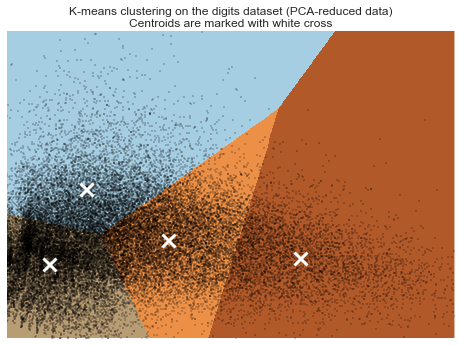

In [366]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(inX)
kmeans = KMeans(init='k-means++', n_clusters=n_groups, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [367]:
lab = kmeans.labels_
lab

array([2, 0, 1, ..., 1, 2, 1], dtype=int32)

In [368]:
np.unique(lab)

array([0, 1, 2, 3], dtype=int32)

In [369]:
len(lab)

38974

In [370]:
insur_df['km_lab'] = lab

In [371]:
gb_km = insur_df.groupby('km_lab').mean()

In [372]:
gb_km[['POVLEV12','HLTHSTAT',"BMINDX53",
            'MNHLTHSTAT','AGELAST', "ADPAIN42","ADCAPE42", 'EDRECODE',
            "ADNRGY42","OBVEXP12",'ERTEXP12',"RXEXP12","IPTEXP12","TOTEXP12"]]

,POVLEV12,HLTHSTAT,BMINDX53,MNHLTHSTAT,AGELAST,ADPAIN42,ADCAPE42,EDRECODE,ADNRGY42,OBVEXP12,ERTEXP12,RXEXP12,IPTEXP12,TOTEXP12
km_lab,,,,,,,,,,,,,,
0,596.141137,1.703105,26.232170,1.467944,44.781014,1.252241,1.920873,14.119693,1.978892,846.937972,685.673703,601.225590,9572.245873,2906.062028
1,179.541226,1.749263,26.776700,1.643166,16.999814,1.042752,1.916476,8.698385,1.896121,180.020664,629.551073,282.268267,9327.814453,1181.275691
2,259.862535,2.694009,28.912321,2.342470,46.347013,1.772782,2.476765,12.608831,2.600583,866.332931,740.130457,1062.062261,10085.273285,4505.657715
3,212.279086,3.629908,31.180314,3.109099,55.424926,3.354978,3.309410,11.983140,3.815448,2050.835270,840.877421,2821.503759,11497.079973,11127.079745


Group 0: 44, poorest, feel ok, low BMI - pay middle on OBV, but lowish on RX, ER & IPT
Group 1: 16, richest, feel ok, low BMI - pay least on OBV, ER, RX, IPT
Group 2: 46, not very poor, feel not great, higher BMI - pay equivalent to Group 0 on OBV, but pay more on ER, IPT and a lot more on RX
Group 3: 55, not very poor, feel the worst, highest BMI - pay the most on OBV, ER, RX, IPT

In [140]:
obY.unique()

array([0, 1])

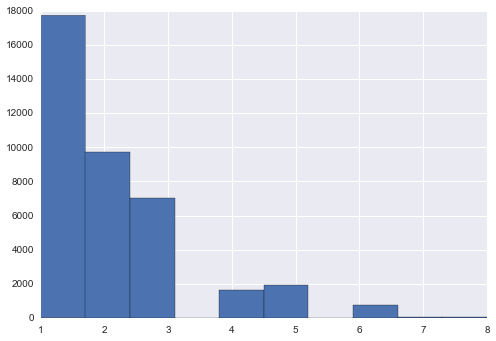

In [175]:
insur_df.INSURC12.hist()

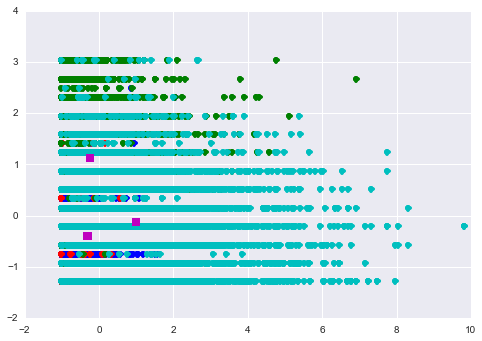

In [183]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq


centroids,_ = kmeans(inX,4)
idx,_ = vq(inX,centroids)

plot(inX[idx==0,0],inX[idx==0,1],'ob',
     inX[idx==1,0],inX[idx==1,1],'or',
     inX[idx==2,0],inX[idx==2,1],'og',
     inX[idx==3,0],inX[idx==3,1],'oc') 
plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
show()

In [223]:
inX = preprocessing.StandardScaler().fit(indf_dat)
inX = inX.transform(indf_dat)
y = insur_df.OBVGrp

n_samples, n_features = inX.shape
n_groups = 6
labels = y
sample_size = 300

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    #print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
    #      % (name, (time() - t0), estimator.inertia_,
    #         metrics.homogeneity_score(labels, estimator.labels_),
    #         metrics.completeness_score(labels, estimator.labels_),
    #         metrics.v_measure_score(labels, estimator.labels_),
    #         metrics.adjusted_rand_score(labels, estimator.labels_),
    #         metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
    #         metrics.silhouette_score(data, estimator.labels_,
    #                                  metric='euclidean',
    #                                  sample_size=sample_size)))
    
pca = PCA(n_components=n_groups).fit(inX)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_groups, n_init=1),
              name="PCA-based",
              data=inX)


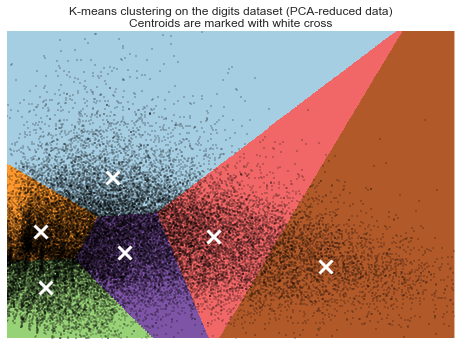

In [224]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(inX)
kmeans = KMeans(init='k-means++', n_clusters=n_groups, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [359]:
lab6 = kmeans.labels_
insur_df['km_lab'] = lab6

In [360]:
metrics.silhouette_score(inX, kmeans.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)

0.093068226379614677

In [361]:
gb_km6 = insur_df.groupby('km_lab').mean()
gb_km6[['POVLEV12','HLTHSTAT',"BMINDX53",
            'MNHLTHSTAT','AGELAST', "ADPAIN42","ADCAPE42", 'EDRECODE',
            "ADNRGY42","OBVEXP12",'ERTEXP12',"RXEXP12","IPTEXP12","TOTEXP12"]]

,POVLEV12,HLTHSTAT,BMINDX53,MNHLTHSTAT,AGELAST,ADPAIN42,ADCAPE42,EDRECODE,ADNRGY42,OBVEXP12,ERTEXP12,RXEXP12,IPTEXP12,TOTEXP12
km_lab,,,,,,,,,,,,,,
0,695.510158,1.873883,26.567344,1.585831,52.490447,1.401578,2.018580,14.478703,2.127257,1189.188431,711.648729,871.993690,9755.147590,4046.810868
1,141.275133,1.808402,27.008281,1.757447,12.676704,1.011989,1.966820,5.048934,1.946187,144.405270,617.228078,260.101352,9305.574237,986.762024
2,283.828220,2.933434,29.503724,2.509184,52.962926,2.302663,2.726828,12.850354,3.023256,1396.785811,780.247556,1469.975902,10575.169194,6627.646613
3,291.178344,1.447447,26.142658,1.314015,22.915972,1.048348,1.792463,12.272142,1.791724,244.987755,641.336113,230.844717,9321.319856,1215.621978
4,194.645519,2.505506,28.186144,2.235007,35.455500,1.342425,2.251505,11.938148,2.232808,345.447176,687.378794,662.260981,9604.758868,2482.257267
5,183.555542,3.848900,31.739618,3.297801,55.530556,3.642361,3.488542,11.711111,4.022222,2284.331250,860.588542,3361.681250,11877.465625,12838.638194


Group 0: 50s, feel good, poorest, low BMI - pay a lot for OBV, IPT, but middle for RX & ER

Group 1: 12s, feel good, lower BMI, not poor - pay least for OBV, ER, IPT, almost pay least for RX

Group 2: 50s, feel not great, higher BMI, not too poor - pay alot for OBV, ER, RX, IPT

Group 3: 20s, feel good, low BMI, not too poor - pay low for OBV, ER, RX, IPT

Group 4: 30s, don't feel okish, higher BMI, not poor - pay not much for OBV, ER, pay middle for IPT/RX\

Group 5: old, feel worst, not poor, highest BMI - pay the most for OBV, RX, IPT, ERV